# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from textblob import TextBlob
from nltk.stem import PorterStemmer,SnowballStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

import warnings
warnings.filterwarnings("ignore")
from io import StringIO
import os
import string
import gensim
from gensim.models import Word2Vec
import itertools
import scipy
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aanchal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aanchal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/aanchal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
tokenizer = ToktokTokenizer()

In [3]:
stopword_list = nltk.corpus.stopwords.words('english')  

# Loading the Dataset

In [4]:
df = pd.read_csv("complaints.csv")

df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60637.0,NaN,Other,Web,2023-04-25,In progress,Yes,NaN,6884739
1,2023-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NC,27886.0,NaN,NaN,Web,2023-04-25,In progress,Yes,NaN,6884755
2,2023-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60471.0,Older American,NaN,Web,2023-04-25,In progress,Yes,NaN,6884826
3,2023-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,Mercedes Benz Financial Services,FL,32837.0,NaN,NaN,Web,2023-04-25,In progress,Yes,NaN,6884722
4,2023-04-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30519.0,NaN,NaN,Web,2023-04-23,In progress,Yes,NaN,6875017


In [5]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [6]:
df.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,3578089,3578089,3342798,3578089,2873997,1289797,1600088,3578089,3536878,3536346,390749,2696022,3578089,3578089,3578085,3578089,768359,3.578089e+06
unique,4163,18,76,165,221,1114724,11,6728,63,61536,3,4,7,4112,8,2,2,NaN
top,2023-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,My credit reports are inaccurate. These inaccu...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,30349,Servicemember,Consent not provided,Web,2023-03-14,Closed with explanation,Yes,No,NaN
freq,4786,1812528,1793670,893398,577447,1774,1381763,649397,425794,3144,222510,1292954,3065811,4731,2671140,3525738,619981,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.929940e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839062e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.708890e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.881517e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.569645e+06


In [7]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        704092
Consumer complaint narrative    2288292
Company public response         1978001
Company                               0
State                             41211
ZIP code                          41743
Tags                            3187340
Consumer consent provided?       882067
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              2809730
Complaint ID                          0
dtype: int64

In [8]:
df1 = df[['Complaint ID','Date received','Product','Issue','Company','State','Submitted via','Company response to consumer','Timely response?','Consumer disputed?','Consumer complaint narrative']]


In [9]:
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Exploratory Data Analysis

<AxesSubplot:xlabel='Product', ylabel='count'>

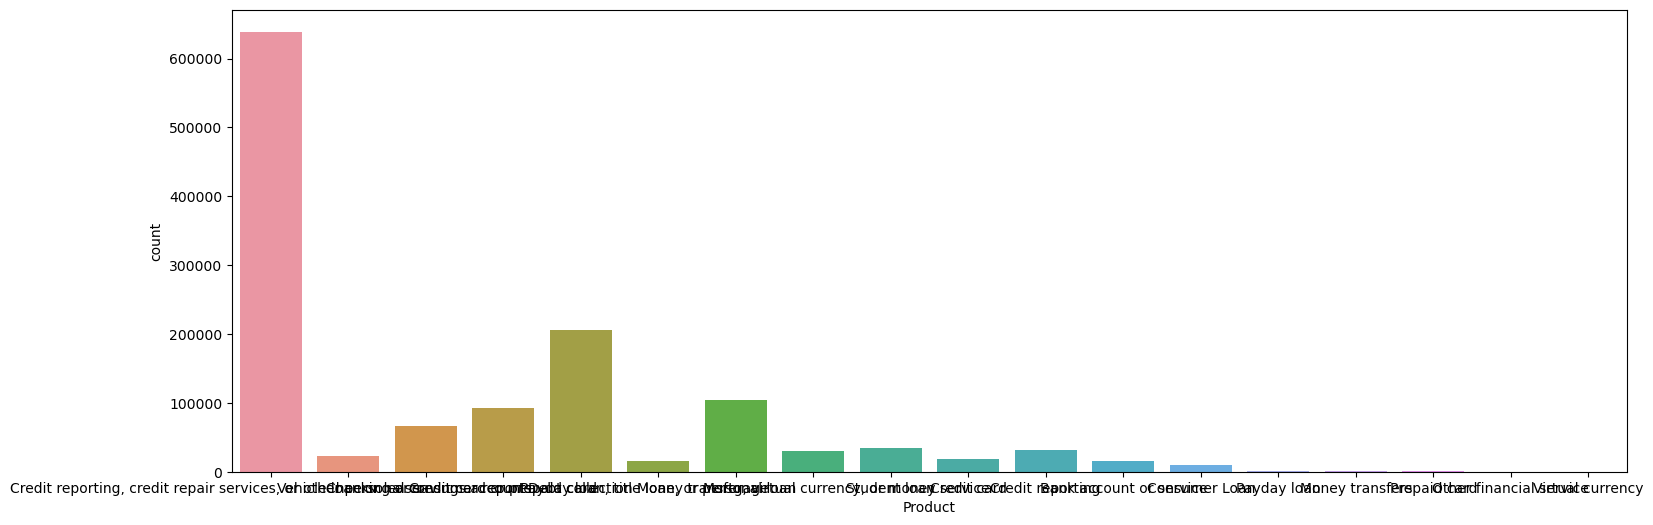

In [10]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='Product',data=df1)

<AxesSubplot:xlabel='Product'>

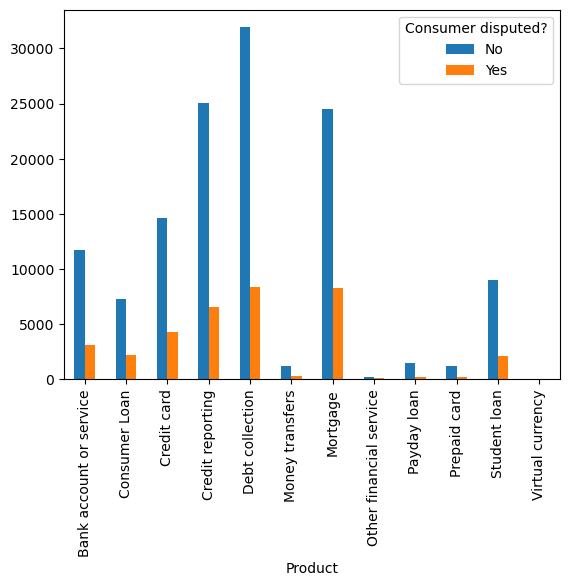

In [11]:
pd.crosstab(df1['Product'],df1['Consumer disputed?']).plot(kind='bar')

In [12]:
df1['Date received'] = pd.to_datetime(df1['Date received'])
df1['Date received'].min(),df1['Date received'].max()

(Timestamp('2015-03-19 00:00:00'), Timestamp('2023-04-19 00:00:00'))

<AxesSubplot:xlabel='Month', ylabel='count'>

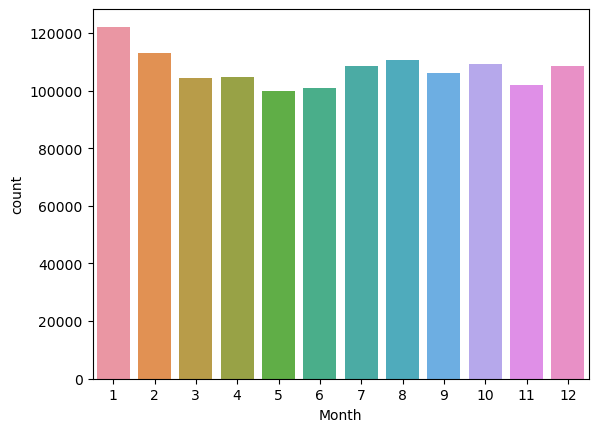

In [13]:
df1['Month'] = df1['Date received'].dt.month
sns.countplot(x='Month',data=df1)

<AxesSubplot:xlabel='Timely response?', ylabel='count'>

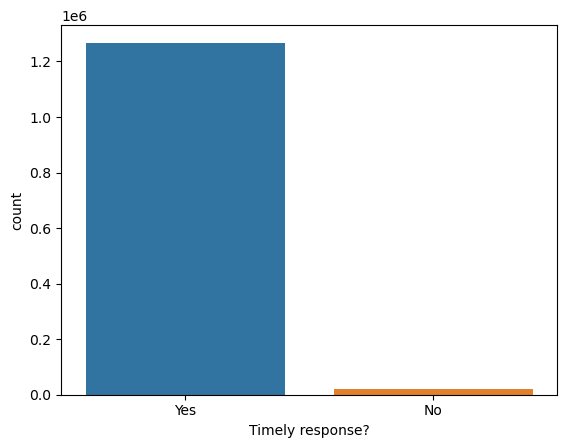

In [14]:
sns.countplot(x='Timely response?',data=df1)

# Text Data Preprocessing


## Converting Text data to Lowercase

In [15]:
df1['Consumer complaint narrative'] =df1['Consumer complaint narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))
df1['Consumer complaint narrative'].sample(2)

3353408    i just found out that there are xxxx liens on ...
1890039    i made a payment on my xxxx xxxx xxxx on frida...
Name: Consumer complaint narrative, dtype: object

## Removing Punctuations

In [16]:
df1['Consumer complaint narrative'] =df1['Consumer complaint narrative'].str.replace(r'[^\w\s]',"")
df1['Consumer complaint narrative'].sample(2)

2440545    i received a call to my cell and to my home ph...
2125022    i paid off a collection account and i was told...
Name: Consumer complaint narrative, dtype: object

## Text Standardization

In [17]:
%config NotebookApp.iopub_data_rate_limit=10000000
dico = {}
# dico1 = open('http://www.hlt.utdallas.edu/~yangl/data/Text_Norm_Data_Release_Fei_Liu/.txt', 'rb')
# for word in dico1:
#     word = word.decode('utf8')
#     word = word.split()
#     dico[word[1]] = word[3]
# dico1.close()
dico2 = open('doc2.txt', 'rb')
for word in dico2:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico2.close()
dico3 = open('doc3.txt', 'rb')
for word in dico3:
    word = word.decode('utf8')
    word = word.split()
    if len(word) >= 2:
        dico[word[0]] = word[1]
dico3.close()

In [18]:
def txt_std(words):
    list_words = words.split()
    for i in range(len(list_words)):
        if list_words[i] in dico.keys():
            list_words[i] = dico[list_words[i]]
    return ' '.join(list_words)

In [19]:
df1['Consumer complaint narrative'] = df1['Consumer complaint narrative'].apply(txt_std)
df1['Consumer complaint narrative'].head(1)

67    on or about xxxx2015 i had financed a 2015 xxx...
Name: Consumer complaint narrative, dtype: object

In [20]:
df1['Consumer complaint narrative'] = df1['Consumer complaint narrative'].str.replace(r"xx+\s","")
df1['Consumer complaint narrative'].head(1)

67    on or about xxxx2015 i had financed a 2015 fro...
Name: Consumer complaint narrative, dtype: object

## Removing stopwords

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['Consumer complaint narrative'] =df1['Consumer complaint narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))
df1['Consumer complaint narrative'].head(1)

67    xxxx2015 financed 2015 bank however afterward ...
Name: Consumer complaint narrative, dtype: object

## Correct spelling

In [22]:
# from textblob import TextBlob
# df1['Consumer complaint narrative'] =df1['Consumer complaint narrative'].apply(lambda x: str(TextBlob(x).correct()))


KeyboardInterrupt: 

## Lemmatizing

In [23]:
from textblob import Word

df1['Consumer complaint narrative'] =df1['Consumer complaint narrative'].apply(lambda x:' '.join([Word(i).lemmatize() for i in x.split()]))
df1['Consumer complaint narrative'].head(1)

67    xxxx2015 financed 2015 bank however afterward ...
Name: Consumer complaint narrative, dtype: object

In [ ]:
for product_name in df1['Product'].unique():
    print(product_name)
    all_words = ' '.join([text for text in df1.loc[df1['Product'].str.contains(product_name),'Consumer complaint narrative']])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Credit reporting, credit repair services, or other personal consumer reports


# Train And Test Split

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(df1['Consumer complaint narrative'], df1['Product'],stratify=df1['Product'], 
                                                    test_size=0.25)

# Feature Engineering

In [ ]:
enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)


In [ ]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df1['Consumer complaint narrative'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(xtrain_tfidf,train_y)

In [ ]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)